# Agrupamiento y visualización de información textual

Autor: Eric S. Tellez <eric.tellez@infotec.mx> <br/>


## Introducción

Hasta el momento hemos visto operaciones de búsqueda de texto completo y de la búsqueda en espacios métricos.
Ambas operaciones son fundamentales en un sistema de recuperación de información, y de hecho, en otras áreas como son la inteligencia computacional.
También se vió la clasificación basada en vecinos cercanos como una herramienta para comparar modelos de texto.

Recordemos que el objetivo de la disciplina de Recuperación de Información es facilitar el acceso a las personas a grandes cúmulos de información,
de tal forma que seamos capaces de encontrar la información sobre la que se realizan consultas. En ese espíritu, el agrupamiento (clustering) y la visualización son de gran ayuda para obtener información de valor.

En el agrupamiento se parte una base de datos métrica (documentos o cualquier otro tipo de dato) de tal forma que los elementos en cada una de sus partes tengan cierta afinidad, por ejemplo que sean cercanos y compactos, o que pertenezcan a un grupo donde la densidad sea alta. Normalmente se intenta reducir una función de costo para cada grupo y de manera global.

Dado que los documentos suelen estar representados en muy alta dimensión, es prácticamente imposible visualizar y aprender sobre la estructura de una base de datos. Esto último lo podemos realizar mediante transformaciones que nos permitan obtener dimensiones que permitan la visualización de las estructuras subyacientes, i.e., dimensiones 2 y 3.

Recuerde que en la representación basada en bolsas de palabras es común encontrar vectores de decenas o cientos de miles de dimensiones, aunque sumamente dispersos. En las representaciones semánticas se encuentran en espacios densos de cientos de dimensiones. La distancia en ambos casos es comúnmente medida en términos de los ángulos de los vectores, ya que esto nos permité disociar las magnitudes que cambiarán con la cantidad de componentes y con el tamaño de los documentos. Lo último nos da ventajas ya que normalmente se desea recuperar documentos largos a partir de consultas pequeñas.

## Agrupamiento (clustering)

Existen diversos algoritmos de clustering que pueden apoyar en la tarea, todos ellos con diferentes características que lo hacen adecuado para ciertas tareas.
En particular, podemos mencionar algunos ejemplos paradigmáticos, como sigue:

- [$k$-means](https://en.wikipedia.org/wiki/K-means_clustering): Intenta encontrar los $k$ centros $C$ que minimicen la suma de las distancias al cuadrado de todos los elementos de la base de datos a algún elemento en $C$. En su forma más simple, el algoritmo comienza con una muestra aleatoria de $k$ puntos y usa el [algoritmo de Lloyd](https://en.wikipedia.org/wiki/Lloyd%27s_algorithm) para refinar los $k$ puntos: en cada iteración, se genera una partición con los elementos más cercanos a cada uno de los centroides, y se usan para generar nuevos centroides. El algoritmo convergerá en algunas iteraciones ya que es bastante rápido. Tiene como desventaja que el usuario debe saber el número de grupos $k$ óptimo y que su calidad puede variar de manera dramática con diferentes formas de inicializar el algoritmo.

- [affinity propagation](https://en.wikipedia.org/wiki/Affinity_propagation): Usa tres matrices y un esquema basado en mensajes para obtener los elementos más adecuados para representar una base de datos. En este algoritmo no es necesario especificar $k$ ya que se calcula como parte del proceso. Las tres matrices son, la matriz de similitud, la matriz de reponsabilidad y de de disponibilidad. La idea es considerar a todos los elementos como posibles centros e intercambiar mensajes entre las matrices de responsabilidad y disponibilidad, usando la matriz de similitud como base de la información. El algoritmo es iterativo y se detendrá cuando no haya cambios en las matrices o se llegue a un límite en el número de las iteraciones. La estructura del cluster emergerá como parte este proceso.

- [DBSCAN](https://es.wikipedia.org/wiki/DBSCAN): Es un algoritmo que es especial para descubrir grupos en base a la densidad, de tal forma que para que dos puntos $u$ y $v$ pertenezcan al mismo grupo, no necesariamente son cercanos entre ellos, pero si que hay una serie de puntos $\{w_i\}$ en el mismo grupo con los que se puede trazar una ruta entre $u$ y $v$. Ahora, para que un elemento forme parte de un grupo debe cumplir que comparte al menos $\ell$ elementos en común con el grupo en un radio de búsqueda $\epsilon$, los puntos dentro de una ruta entonces cumplen con estas propiedades. A diferencia de los algoritmos basados en particiones compactas, las formas de los grupos en DBSCAN pueden ser caprichosas. No es necesario conocer el número de centros pero si $\ell$ y $\epsilon$.

## Proyecciones a baja dimensión
Una de las herramientas más importantes para el entendimiento de una colección de objetos, llamese documento o cualquier otro tipo de dato, es la visualización. La visualización consiste en obtener proyecciones en 2D o 3D y utilizar diferentes estrategias para que la información de valor sea _evidente_ a nuestros ojos.

En particular, podemos considerar dos formas primordiales de proyecciones: lineales y no-lineales. Las proyecciones lineales son eficientes de calcular pero solo podrán capturar información lineal en la proyección. Un ejemplo paradigmático es Principal Compontent Analysis ([PCA](https://en.wikipedia.org/wiki/Principal_component_analysis)), que es ampliamente usado en ciencia de datos y que la gran mayoría de la paquetería para análisis de datos lo implementará ([PCA en sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html), [PCA en Julia](https://github.com/JuliaStats/MultivariateStats.jl)). En particular, cuando los datos podrían no ser proyectados de manera adecuada con transformaciones lineales, entonces se hace necesario el uso de transformaciones no lineales. En este caso podemos tener en cuenta Kernel PCA ([KPCA](https://en.wikipedia.org/wiki/Kernel_principal_component_analysis)) cuya no linearidad es manejada por funciones kernel, i.e., realizando una proyección no-linear mediante el kernel antes de aplicar PCA.

La familia de métodos _manifold learning_ también pueden ser una opción. En estos casos, en lugar de analizar las componentes de los vectores, se hace uso de la matriz de afinidad $A$, i.e., matriz de distancias $d(u, v) \forall u, v \in X$, o el grafo de todos los $k$ vecinos cercanos $G$. En particular, estos métodos intentarán crear representaciones vectoriales de baja dimensión que repreduzcan hasta cierto nivel de precisión dicha matriz $A$ o $G$, esto es, que las relaciones topológicas se preserven. Entre estos métodos podemos encontrar [Isomap](https://en.wikipedia.org/wiki/Isomap), [tSNE](https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding) o [UMAP](https://umap-learn.readthedocs.io/en/latest/).

En particular, es posible encontrar implementaciones de ellos en [sklearn](https://scikit-learn.org/stable/modules/manifold.html) y [UMAP](https://umap-learn.readthedocs.io/en/latest/) para Python; en Julia [ManifoldLearning.jl](https://github.com/wildart/ManifoldLearning.jl) y [SimSearchManifoldLearning.jl](https://github.com/sadit/SimSearchManifoldLearning.jl), donde también se puede acceder a una implementación eficiente de UMAP.


# Ejemplo


In [5]:
using Pkg
Pkg.activate(".")

using SimilaritySearch, SimSearchManifoldLearning, TextSearch, Embeddings, Plots, LinearAlgebra, MLDatasets, HypertextLiteral

  Activating project at `~/IR-2022/Unidades`


In [12]:
function create_index(vectors)
    dist = NormalizedCosineDistance()
    db = VectorDatabase(vectors)
    index = SearchGraph(; dist, db, verbose=false)
    index!(index)
    optimize!(index, MinRecall(0.9))
    index
end

function text_model_and_vectors(corpus;
        textconfig=TextConfig(group_usr=false, group_url=true, del_diac=true, lc=true, group_num=true, nlist=[1], qlist=[]),
        model=VectorModel(IdfWeighting(), TfWeighting(), textconfig, corpus)
    )
    vectors = vectorize_corpus(model, textconfig, corpus)
    (; textconfig, model, vectors)
end


text_model_and_vectors (generic function with 1 method)

In [14]:
include("read_datasets.jl")
D, _ = read_emojispace()
T = text_model_and_vectors(D.corpus);

In [16]:
@time index = create_index(T.vectors);

  6.289947 seconds (585.60 k allocations: 227.621 MiB)


In [17]:
function create_umap_embeddings(index; k=15, n_epochs=100, neg_sample_rate=3, tol=1e-3, layout=RandomLayout())
    #layout = RandomLayout()
    # increase both `n_epochs` and `neg_sample_rate` to improve projection
    #layout = SpectralLayout() ## the results are much better with Spectral layout
    U2 = fit(UMAP, index; k, neg_sample_rate, layout, n_epochs, tol)  # spectral layout is too slow for the input-data
    U3 = fit(U2, 3; neg_sample_rate, n_epochs, tol)  # reuses U2
    (e2=U2.embedding, e3=U3.embedding)
end

function normcolors(V)
    min_, max_ = extrema(V)
    V .= (V .- min_) ./ (max_ - min_)
    V .= clamp.(V, 0, 1)
end

function plot_umap(e2, e3)
    normcolors(@view e3[1, :])
    normcolors(@view e3[2, :])
    normcolors(@view e3[3, :])

    C = [RGB(c...) for c in eachcol(e3)]
    X = @view e2[1, :]
    Y = @view e2[2, :]
    P = scatter(X, Y, c=C, fmt=:png, size=(600, 600), ma=0.3, a=0.3, ms=1, msw=0, label="")
    display(plot!(title="colors are related to spatial proximity in the 3d projection")) 
end

plot_umap (generic function with 1 method)

In [24]:
@time e2, e3 = create_umap_embeddings(index, k=20, tol=1e-3, layout=RandomLayout());

 22.100245 seconds (439.14 k allocations: 3.203 GiB, 1.75% gc time)
 31.903140 seconds (641.38 k allocations: 3.296 GiB, 2.46% gc time, 0.34% compilation time)


*** computing graph
*** layout embedding RandomLayout
*** fit ab / embedding
*** opt embedding
UMAP construction time cost report:
- fuzzy graph: 0.730894681
- embedding init: 0.000473421
- embedding opt: 4.001127225



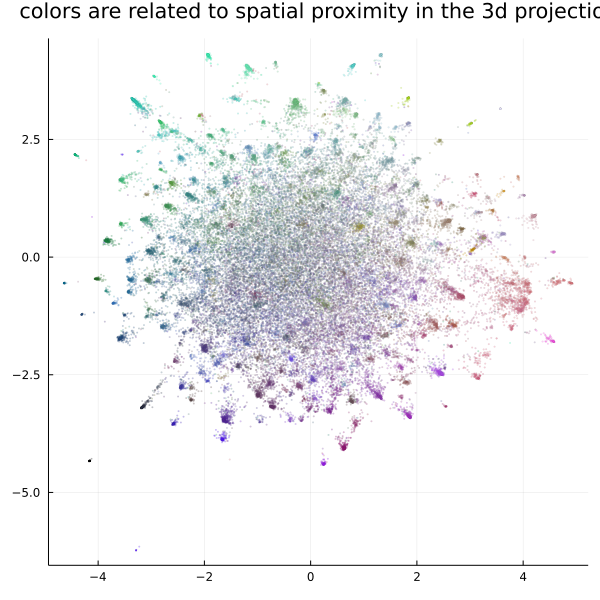

In [25]:
plot_umap(e2, e3)

# Clustering


# Actividades
- Si usa Julia, revise el paquete `SimilaritySearch.jl`: <https://github.com/sadit/SimilaritySearch.jl> y <https://github.com/sadit/SimSearchManifoldLearning.jl>.
- Si usa Python, revise el paquete UMAP: <https://umap-learn.readthedocs.io/en/latest/>.
- Prepare la colección de `noticias` o el `emojispace` con la representación semántica basada en prototipos o la basada en nubes de puntos de las unidades anteriores, adicionalmente reproduzcalo para la representación basada en bolsa de palabras (primeras unidades del curso). Reproduzca las operaciones y el análisis de este notebook con estos datos.
- Reporte su notebook con una comparación de tiempos y calidadades.

# Bibliografía

- [@AW2019] Amid, E., & Warmuth, M. K. (2019). TriMap: Large-scale dimensionality reduction using triplets. arXiv preprint arXiv:1910.00204.
- [@LV2017] Lee, J. A., & Verleysen, M. (2007). Nonlinear dimensionality reduction (Vol. 1). New York: Springer.
- [@MHM2018] McInnes, L., Healy, J., & Melville, J. (2018). Umap: Uniform manifold approximation and projection for dimension reduction. arXiv preprint arXiv:1802.03426.
- [@SKL2011] Pedregosa, F., Varoquaux, G., Gramfort, A., Michel, V., Thirion, B., Grisel, O., ... & Duchesnay, E. (2011). Scikit-learn: Machine learning in Python. the Journal of machine Learning research, 12, 2825-2830.
- [@SPA2019] Soto, A. J., Przybyła, P., & Ananiadou, S. (2019). Thalia: semantic search engine for biomedical abstracts. Bioinformatics, 35(10), 1799-1801.
- [@SS2021] Sharma, K. K., & Seal, A. (2021). Spectral embedded generalized mean based k-nearest neighbors clustering with S-distance. Expert Systems with Applications, 169, 114326.
- [@VMH2018] Van der Maaten, L., & Hinton, G. (2008). Visualizing data using t-SNE. Journal of machine learning research, 9(11).
- [@YCC2020] Yu, Q., Chen, K. H., & Chen, J. J. (2020, September). Using a set of triangle inequalities to accelerate k-means clustering. In International Conference on Similarity Search and Applications (pp. 297-311). Springer, Cham.